In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline
import os
import wrangle
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
#sklearn stuff 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from scipy import stats
import utilities
import warnings
warnings.filterwarnings("ignore")


# Modeling

In [2]:
df = wrangle.get_terrorism_data()

In [3]:
df = wrangle.prep_df(df)

In [4]:
cols_to_drop =['eventid',
 'year',
 'month',
 'day',
 'country',
 'region',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'success',
 'suicide',
 'attack_type',
 'targ_desc',
 'targeted_group',
 'tg_desc',
 'nationality',
 'atk_group',
 'claimed',
 'weap_type',
 'weap_sub',
 'killed',
 'us_killed',
 'ter_killed',
 'wounded',
 'us_wounded',
 'ter_wounded',
 'property']

In [5]:
df3 = df.drop(cols_to_drop, axis = 1)

In [6]:
df3 = df3.replace(['educational institution'], 'other')
df3 = df3.replace(['religious figures/institutions'], 'other')
df3 = df3.replace(['transportation'], 'other')
df3 = df3.replace(['utilities'], 'other')
df3 = df3.replace(['government (diplomatic)'], 'other')
df3 = df3.replace(['violent political party'], 'other')
df3 = df3.replace(['journalists & media'], 'other')
df3 = df3.replace(['ngo'], 'other')
df3 = df3.replace(['airports & aircraft'], 'other')
df3 = df3.replace(['telecommunication'], 'other')
df3 = df3.replace(['food or water supply'], 'other')
df3 = df3.replace(['tourists'], 'other')
df3 = df3.replace(['maritime'], 'other')
df3 = df3.replace(['terrorists/non-state militia'], 'other')
df3 = df3.replace(['business'], 'other')

In [7]:
df3.target.value_counts()

private citizens & property    12194
other                          10402
police                          8866
military                        8011
government (general)            4836
Name: target, dtype: int64

In [8]:
df.year = df.year.astype('str')

In [9]:
df.month = df.month.astype('str')

In [10]:
encoded_df = pd.get_dummies(df[['attack_type','suicide', 'month', 'country', 'provstate', 'year', 'weap_type', 'nationality', 'city']], dummy_na=False, drop_first=[True, True])

In [11]:
df2 = pd.concat([df3, encoded_df], axis = 1)

In [12]:
df2_trial = df.copy()

In [13]:
df2_trial

,eventid,year,month,day,country,region,provstate,city,latitude,longitude,...,claimed,weap_type,weap_sub,killed,us_killed,ter_killed,wounded,us_wounded,ter_wounded,property
0,200101010004,2001,1,1,turkey,middle east & north africa,istanbul,istanbul,41.106178,28.689863,...,0.0,explosives,pipe bomb,0.0,0.0,0.0,10.0,0.0,0.0,1
1,200101030001,2001,1,3,turkey,middle east & north africa,istanbul,istanbul,41.106178,28.689863,...,0.0,explosives,suicide (carried bodily by human being),3.0,0.0,1.0,7.0,0.0,0.0,1
3,200101070003,2001,1,7,turkey,middle east & north africa,istanbul,istanbul,41.106178,28.689863,...,0.0,firearms,unknown gun type,0.0,0.0,0.0,1.0,0.0,0.0,1
6,200101080002,2001,1,8,turkey,middle east & north africa,istanbul,istanbul,41.106178,28.689863,...,-9.0,melee,knife or other sharp object,0.0,0.0,0.0,1.0,0.0,0.0,0
7,200101100004,2001,1,10,turkey,middle east & north africa,istanbul,istanbul,41.106178,28.689863,...,-9.0,firearms,unknown gun type,1.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62719,201712310013,2017,12,31,somalia,sub-saharan africa,bakool,wajid,3.810951,43.246506,...,0.0,explosives,"projectile (rockets, mortars, rpgs, etc.)",0.0,0.0,0.0,0.0,0.0,0.0,-9
62720,201712310018,2017,12,31,afghanistan,south asia,faryab,kohistan district,35.315467,64.815508,...,0.0,firearms,unknown gun type,6.0,0.0,0.0,0.0,0.0,0.0,0
62721,201712310020,2017,12,31,afghanistan,south asia,faryab,maymana,35.921051,64.774544,...,0.0,explosives,unknown explosive type,0.0,0.0,0.0,4.0,0.0,0.0,1
62722,201712310022,2017,12,31,somalia,sub-saharan africa,middle shebelle,ceelka geelow,2.359673,45.385034,...,1.0,firearms,unknown gun type,1.0,0.0,0.0,2.0,0.0,0.0,-9


In [14]:
df_keep = df[['target','atk_group', 'weap_sub','attack_type','suicide', 'month', 'country','property', 'provstate', 'year', 'weap_type', 'nationality', 'city']]

In [15]:
df_keep

,target,atk_group,weap_sub,attack_type,suicide,month,country,property,provstate,year,weap_type,nationality,city
0,private citizens & property,unknown,pipe bomb,bombing/explosion,0,1,turkey,1,istanbul,2001,explosives,turkey,istanbul
1,police,devrimici halk kurtulus cephesi (dhkp/c),suicide (carried bodily by human being),bombing/explosion,1,1,turkey,1,istanbul,2001,explosives,turkey,istanbul
3,police,devrimici halk kurtulus cephesi (dhkp/c),unknown gun type,armed assault,0,1,turkey,1,istanbul,2001,firearms,turkey,istanbul
6,educational institution,great eastern islamic raiders front (ibda-c),knife or other sharp object,armed assault,0,1,turkey,0,istanbul,2001,melee,turkey,istanbul
7,police,unknown,unknown gun type,armed assault,0,1,turkey,1,istanbul,2001,firearms,turkey,istanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62719,military,al-shabaab,"projectile (rockets, mortars, rpgs, etc.)",bombing/explosion,0,12,somalia,-9,bakool,2017,explosives,international,wajid
62720,terrorists/non-state militia,taliban,unknown gun type,armed assault,0,12,afghanistan,0,faryab,2017,firearms,afghanistan,kohistan district
62721,business,unknown,unknown explosive type,bombing/explosion,0,12,afghanistan,1,faryab,2017,explosives,afghanistan,maymana
62722,military,al-shabaab,unknown gun type,armed assault,0,12,somalia,-9,middle shebelle,2017,firearms,somalia,ceelka geelow


In [16]:
df2_trial = df_keep.copy()

In [17]:
df2_trial = df2_trial.drop(columns = 'target')

In [18]:
df2_trial = pd.concat([df2_trial, df3], axis=1)

In [19]:
df2_trial.target.value_counts()

private citizens & property    12194
other                          10402
police                          8866
military                        8011
government (general)            4836
Name: target, dtype: int64

In [20]:
df2_trial['attack_type'] = df2_trial.attack_type.replace(['hijacking'], 'other') 
df2_trial['attack_type'] = df2_trial.attack_type.replace(['unarmed assault'], 'other') 
df2_trial['attack_type'] = df2_trial.attack_type.replace(['hostage taking (barricade incident)'], 'other') 
df2_trial['attack_type'] = df2_trial.attack_type.replace(['facility/infrastructure attack'], 'other') 
df2_trial['attack_type'] = df2_trial.attack_type.replace(['hostage taking (kidnapping)'], 'other') 
df2_trial['country'] = df2_trial.country.replace(['turkey'], 'other')
df2_trial['country'] = df2_trial.country.replace(['syria'], 'other')
df2_trial['country'] = df2_trial.country.replace(['israel'], 'other')
df2_trial['country'] = df2_trial.country.replace(['sudan'], 'other')
df2_trial['country'] = df2_trial.country.replace(['lebanon'], 'other')
df2_trial['country'] = df2_trial.country.replace(['saudi arabia'], 'other')
df2_trial['country'] = df2_trial.country.replace(['bahrain'], 'other')
df2_trial['country'] = df2_trial.country.replace(['iran'], 'other')
df2_trial['country'] = df2_trial.country.replace(['jordan'], 'other')
df2_trial['country'] = df2_trial.country.replace(['kuwait'], 'other')
df2_trial['country'] = df2_trial.country.replace(['qatar'], 'other')
df2_trial['country'] = df2_trial.country.replace(['djibouti'], 'other')
df2_trial['weap_type'] = df2_trial.weap_type.replace(['melee'], 'other')
df2_trial['weap_type'] = df2_trial.weap_type.replace(['chemical'], 'other')

In [21]:
bottom = df2_trial.nationality.value_counts().index.to_list()
bottom = bottom[10:]
df2_trial.nationality = df2_trial.nationality.replace(bottom, 'other')

In [22]:
bottom_city = df2_trial.city.value_counts().index.to_list()
bottom_city = bottom_city[25:]
df2_trial.city = df2_trial.city.replace(bottom_city, 'other')

In [23]:
bottom_terr_groups = df2_trial.atk_group.value_counts().index.to_list()
bottom_terr_groups = bottom_terr_groups[19:]
df2_trial.atk_group = df2_trial.atk_group.replace(bottom_terr_groups, 'other')

In [24]:
df2_trial.atk_group.value_counts().head()

unknown                                        27631
taliban                                         4809
islamic state of iraq and the levant (isil)     3700
other                                           2201
al-shabaab                                      1559
Name: atk_group, dtype: int64

In [25]:
df2_trial

,atk_group,weap_sub,attack_type,suicide,month,country,property,provstate,year,weap_type,nationality,city,target
0,unknown,pipe bomb,bombing/explosion,0,1,other,1,istanbul,2001,explosives,turkey,other,private citizens & property
1,other,suicide (carried bodily by human being),bombing/explosion,1,1,other,1,istanbul,2001,explosives,turkey,other,police
3,other,unknown gun type,armed assault,0,1,other,1,istanbul,2001,firearms,turkey,other,police
6,other,knife or other sharp object,armed assault,0,1,other,0,istanbul,2001,other,turkey,other,other
7,unknown,unknown gun type,armed assault,0,1,other,1,istanbul,2001,firearms,turkey,other,police
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62719,al-shabaab,"projectile (rockets, mortars, rpgs, etc.)",bombing/explosion,0,12,somalia,-9,bakool,2017,explosives,international,other,military
62720,taliban,unknown gun type,armed assault,0,12,afghanistan,0,faryab,2017,firearms,afghanistan,other,other
62721,unknown,unknown explosive type,bombing/explosion,0,12,afghanistan,1,faryab,2017,explosives,afghanistan,other,other
62722,al-shabaab,unknown gun type,armed assault,0,12,somalia,-9,middle shebelle,2017,firearms,somalia,other,military


In [26]:
bottom_weap_sub_groups = df2_trial.weap_sub.value_counts().index.to_list()
bottom_weap_sub_groups = bottom_weap_sub_groups[17:]
df2_trial.weap_sub = df2_trial.weap_sub.replace(bottom_weap_sub_groups, 'other')

In [27]:
df2_trial.weap_sub.value_counts()

unknown explosive type                       11958
unknown gun type                             10914
vehicle                                       5333
projectile (rockets, mortars, rpgs, etc.)     4408
suicide (carried bodily by human being)       1713
other explosive type                          1638
landmine                                      1621
remote trigger                                1339
grenade                                       1186
sticky bomb                                   1113
automatic or semi-automatic rifle              848
handgun                                        553
arson/fire                                     547
other                                          339
knife or other sharp object                    319
rifle/shotgun (non-automatic)                  251
time fuse                                      125
molotov cocktail/petrol bomb                   104
Name: weap_sub, dtype: int64

In [28]:
df2_trial

,atk_group,weap_sub,attack_type,suicide,month,country,property,provstate,year,weap_type,nationality,city,target
0,unknown,other,bombing/explosion,0,1,other,1,istanbul,2001,explosives,turkey,other,private citizens & property
1,other,suicide (carried bodily by human being),bombing/explosion,1,1,other,1,istanbul,2001,explosives,turkey,other,police
3,other,unknown gun type,armed assault,0,1,other,1,istanbul,2001,firearms,turkey,other,police
6,other,knife or other sharp object,armed assault,0,1,other,0,istanbul,2001,other,turkey,other,other
7,unknown,unknown gun type,armed assault,0,1,other,1,istanbul,2001,firearms,turkey,other,police
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62719,al-shabaab,"projectile (rockets, mortars, rpgs, etc.)",bombing/explosion,0,12,somalia,-9,bakool,2017,explosives,international,other,military
62720,taliban,unknown gun type,armed assault,0,12,afghanistan,0,faryab,2017,firearms,afghanistan,other,other
62721,unknown,unknown explosive type,bombing/explosion,0,12,afghanistan,1,faryab,2017,explosives,afghanistan,other,other
62722,al-shabaab,unknown gun type,armed assault,0,12,somalia,-9,middle shebelle,2017,firearms,somalia,other,military


In [29]:
cluster_data = df2_trial.copy()
cluster_data = cluster_data.drop(columns={'target'})

In [30]:
cluster_data

,atk_group,weap_sub,attack_type,suicide,month,country,property,provstate,year,weap_type,nationality,city
0,unknown,other,bombing/explosion,0,1,other,1,istanbul,2001,explosives,turkey,other
1,other,suicide (carried bodily by human being),bombing/explosion,1,1,other,1,istanbul,2001,explosives,turkey,other
3,other,unknown gun type,armed assault,0,1,other,1,istanbul,2001,firearms,turkey,other
6,other,knife or other sharp object,armed assault,0,1,other,0,istanbul,2001,other,turkey,other
7,unknown,unknown gun type,armed assault,0,1,other,1,istanbul,2001,firearms,turkey,other
...,...,...,...,...,...,...,...,...,...,...,...,...
62719,al-shabaab,"projectile (rockets, mortars, rpgs, etc.)",bombing/explosion,0,12,somalia,-9,bakool,2017,explosives,international,other
62720,taliban,unknown gun type,armed assault,0,12,afghanistan,0,faryab,2017,firearms,afghanistan,other
62721,unknown,unknown explosive type,bombing/explosion,0,12,afghanistan,1,faryab,2017,explosives,afghanistan,other
62722,al-shabaab,unknown gun type,armed assault,0,12,somalia,-9,middle shebelle,2017,firearms,somalia,other


In [31]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(cluster_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 295502.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 295502.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 295502.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 295502.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 295502.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8443, cost: 265168.0
Run 1, iteration: 2/100, moves: 4400, cost: 265168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8440, cost: 267410.0
Run 2, it

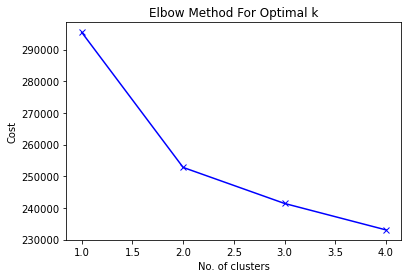

In [32]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(cluster_data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14266, cost: 242974.0
Run 1, iteration: 2/100, moves: 5258, cost: 241153.0
Run 1, iteration: 3/100, moves: 226, cost: 241153.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5567, cost: 245417.0
Run 2, iteration: 2/100, moves: 1215, cost: 242608.0
Run 2, iteration: 3/100, moves: 2146, cost: 242608.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9734, cost: 248355.0
Run 3, iteration: 2/100, moves: 1378, cost: 247954.0
Run 3, iteration: 3/100, moves: 86, cost: 247954.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13176, cost: 251111.0
Run 4, iteration: 2/100, moves: 1962, cost: 250849.0
Run 4, iteration: 3/100, moves: 38, cost: 250849.0
Init: initializing centroids
Init: initializing

array([1, 1, 0, ..., 1, 0, 2], dtype=uint16)

In [34]:
data = cluster_data.copy()
data.insert(0, "Cluster", clusters, True)
data

,Cluster,atk_group,weap_sub,attack_type,suicide,month,country,property,provstate,year,weap_type,nationality,city
0,1,unknown,other,bombing/explosion,0,1,other,1,istanbul,2001,explosives,turkey,other
1,1,other,suicide (carried bodily by human being),bombing/explosion,1,1,other,1,istanbul,2001,explosives,turkey,other
3,0,other,unknown gun type,armed assault,0,1,other,1,istanbul,2001,firearms,turkey,other
6,0,other,knife or other sharp object,armed assault,0,1,other,0,istanbul,2001,other,turkey,other
7,0,unknown,unknown gun type,armed assault,0,1,other,1,istanbul,2001,firearms,turkey,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62719,2,al-shabaab,"projectile (rockets, mortars, rpgs, etc.)",bombing/explosion,0,12,somalia,-9,bakool,2017,explosives,international,other
62720,0,taliban,unknown gun type,armed assault,0,12,afghanistan,0,faryab,2017,firearms,afghanistan,other
62721,1,unknown,unknown explosive type,bombing/explosion,0,12,afghanistan,1,faryab,2017,explosives,afghanistan,other
62722,0,al-shabaab,unknown gun type,armed assault,0,12,somalia,-9,middle shebelle,2017,firearms,somalia,other


In [35]:
dummy_df = pd.get_dummies(data[['Cluster',
                               'provstate',
                                'year',
                                'suicide',
                                'country',
                                'city',
                                'property',
                              'nationality',
                              'month',
                              'attack_type',
                              'atk_group', 
                              'weap_type',
                              'weap_sub']], dummy_na=False, drop_first=[True, True])
df_trial2 = pd.concat([df3, dummy_df], axis = 1)

In [36]:
df_trial2

,target,Cluster,suicide,property,provstate_adiyaman,provstate_agri,provstate_ahmadi,provstate_al anbar,provstate_al hasakah,provstate_al qadisiyah,...,weap_sub_other explosive type,"weap_sub_projectile (rockets, mortars, rpgs, etc.)",weap_sub_remote trigger,weap_sub_rifle/shotgun (non-automatic),weap_sub_sticky bomb,weap_sub_suicide (carried bodily by human being),weap_sub_time fuse,weap_sub_unknown explosive type,weap_sub_unknown gun type,weap_sub_vehicle
0,private citizens & property,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,police,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,police,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,other,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,police,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62719,military,2,0,-9,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
62720,other,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
62721,other,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
62722,military,0,0,-9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
#split the data
encoded_train, encoded_validate, encoded_test = wrangle.split_data(df_trial2)
encoded_train.shape, encoded_validate.shape, encoded_test.shape

((24812, 372), (10635, 372), (8862, 372))

In [38]:
X_train = encoded_train.drop(columns=["target"])
y_train = encoded_train.target

X_validate = encoded_validate.drop(columns=["target"])
y_validate = encoded_validate.target

X_test = encoded_test.drop(columns=["target"])
y_test = encoded_test.target

In [39]:
metrics = []

for i in range(1, 30):

    tree = DecisionTreeClassifier(max_depth=i, random_state=17)


    tree = tree.fit(X_train, y_train)


    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dt_df = pd.DataFrame(metrics)
dt_df["difference"] = dt_df.train_accuracy - dt_df.validate_accuracy
dt_df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.300177,0.287541,0.012636
1,2,0.320974,0.306911,0.014063
2,3,0.354224,0.342172,0.012052
3,4,0.354627,0.342360,0.012267
4,5,0.363534,0.349506,0.014027
5,6,0.391262,0.372920,0.018343
6,7,0.398678,0.376493,0.022185
7,8,0.411897,0.391161,0.020736
8,9,0.430074,0.400940,0.029134
9,10,0.449057,0.416643,0.032414


In [40]:
metrics = []

for i in range(1, 40):

    tree = RandomForestClassifier(bootstrap = True, 
                                  class_weight = None,
                                  criterion = 'gini', 
                                  min_samples_leaf = 3, 
                                  n_estimators = 150,
                                  max_depth=i,
                                  random_state=17)


    tree = tree.fit(X_train, y_train)


    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
rf_df = pd.DataFrame(metrics)
rf_df["difference"] = rf_df.train_accuracy - rf_df.validate_accuracy
rf_df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.277729,0.266855,0.010874
1,2,0.327583,0.315374,0.012210
2,3,0.352733,0.341796,0.010937
3,4,0.366879,0.353926,0.012953
4,5,0.383887,0.369629,0.014258
5,6,0.401177,0.384861,0.016316
6,7,0.418749,0.397085,0.021664
7,8,0.439828,0.409873,0.029954
8,9,0.450830,0.417960,0.032871
9,10,0.463888,0.425576,0.038313


In [41]:
df.T

,0,1,3,6,7,8,10,11,12,13,...,62713,62714,62716,62717,62718,62719,62720,62721,62722,62723
eventid,200101010004,200101030001,200101070003,200101080002,200101100004,200101110003,200101210006,200101220006,200101230007,200101240001,...,201712310004,201712310006,201712310008,201712310009,201712310012,201712310013,201712310018,201712310020,201712310022,201712310029
year,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
month,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
day,1,3,7,8,10,11,21,22,23,24,...,31,31,31,31,31,31,31,31,31,31
country,turkey,turkey,turkey,turkey,turkey,israel,iran,afghanistan,turkey,turkey,...,iraq,afghanistan,somalia,afghanistan,iraq,somalia,afghanistan,afghanistan,somalia,syria
region,middle east & north africa,middle east & north africa,middle east & north africa,middle east & north africa,middle east & north africa,middle east & north africa,middle east & north africa,south asia,middle east & north africa,middle east & north africa,...,middle east & north africa,south asia,sub-saharan africa,south asia,middle east & north africa,sub-saharan africa,south asia,south asia,sub-saharan africa,middle east & north africa
provstate,istanbul,istanbul,istanbul,istanbul,istanbul,jerusalem,tehran,kabul,mersin,diyarbakir,...,saladin,nangarhar,banaadir,logar,diyala,bakool,faryab,faryab,middle shebelle,lattakia
city,istanbul,istanbul,istanbul,istanbul,istanbul,jerusalem,tehran,kabul,unknown,diyarbakir,...,farhatiyah,jalalabad,mogadishu,mohammad agha district,muqdadiyah,wajid,kohistan district,maymana,ceelka geelow,jableh
latitude,41.106178,41.106178,41.106178,41.106178,41.106178,31.771599,35.724533,34.516895,36.806853,37.922218,...,34.031331,34.417122,2.059819,34.217806,33.953167,3.810951,35.315467,35.921051,2.359673,35.407278
longitude,28.689863,28.689863,28.689863,28.689863,28.689863,35.2034,51.40519,69.147011,34.628893,40.184376,...,44.070106,70.449593,45.326115,69.109316,44.921906,43.246506,64.815508,64.774544,45.385034,35.942679


In [42]:
df2_trial_keep = df2_trial[['target','atk_group', 'weap_sub','attack_type','suicide', 'month', 'country', 'provstate', 'year', 'weap_type', 'nationality', 'city']]

In [43]:
df2_trial.target.value_counts()

private citizens & property    12194
other                          10402
police                          8866
military                        8011
government (general)            4836
Name: target, dtype: int64

In [44]:
df2_trial_keep.target.value_counts()

private citizens & property    12194
other                          10402
police                          8866
military                        8011
government (general)            4836
Name: target, dtype: int64

In [45]:
cluster_data = df2_trial_keep
cluster_data = cluster_data.drop(columns={'target'})

In [46]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(cluster_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 268818.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 268818.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 268818.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 268818.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 268818.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5811, cost: 233098.0
Run 1, iteration: 2/100, moves: 168, cost: 233098.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5889, cost: 257401.0
Run 2, ite

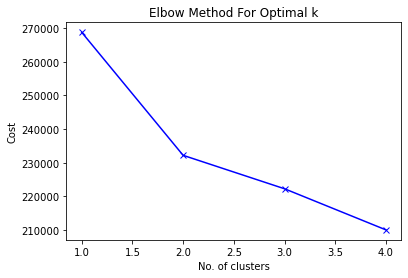

In [47]:
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [48]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(cluster_data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11435, cost: 223448.0
Run 1, iteration: 2/100, moves: 4785, cost: 223448.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7131, cost: 223561.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4292, cost: 234188.0
Run 3, iteration: 2/100, moves: 2273, cost: 234188.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7957, cost: 224573.0
Run 4, iteration: 2/100, moves: 1129, cost: 224573.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11774, cost: 227725.0
Run 5, iteration: 2/100, moves: 1480, cost: 227725.0
Best run was number 1


array([0, 0, 0, ..., 1, 0, 0], dtype=uint16)

In [49]:
data = cluster_data.copy()
data.insert(0, "Cluster", clusters, True)
data

,Cluster,atk_group,weap_sub,attack_type,suicide,month,country,provstate,year,weap_type,nationality,city
0,0,unknown,other,bombing/explosion,0,1,other,istanbul,2001,explosives,turkey,other
1,0,other,suicide (carried bodily by human being),bombing/explosion,1,1,other,istanbul,2001,explosives,turkey,other
3,0,other,unknown gun type,armed assault,0,1,other,istanbul,2001,firearms,turkey,other
6,0,other,knife or other sharp object,armed assault,0,1,other,istanbul,2001,other,turkey,other
7,0,unknown,unknown gun type,armed assault,0,1,other,istanbul,2001,firearms,turkey,other
...,...,...,...,...,...,...,...,...,...,...,...,...
62719,0,al-shabaab,"projectile (rockets, mortars, rpgs, etc.)",bombing/explosion,0,12,somalia,bakool,2017,explosives,international,other
62720,2,taliban,unknown gun type,armed assault,0,12,afghanistan,faryab,2017,firearms,afghanistan,other
62721,1,unknown,unknown explosive type,bombing/explosion,0,12,afghanistan,faryab,2017,explosives,afghanistan,other
62722,0,al-shabaab,unknown gun type,armed assault,0,12,somalia,middle shebelle,2017,firearms,somalia,other


In [50]:
data.city.to_list()

['other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'kabul',
 'unknown',
 'other',
 'other',
 'other',
 'other',
 'karachi',
 'other',
 'kabul',
 'kabul',
 'kabul',
 'karachi',
 'other',
 'other',
 'kabul',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'karachi',
 'quetta',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'jalalabad',
 'baghdad',
 'kabul',
 'other',
 'other',
 'mogadishu',
 'karachi',
 'karachi',
 'other',
 'other',
 'other',
 'other',
 'mogadishu',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'karachi',
 'other',
 'other',
 'other',
 'karachi',
 'other',
 'other',
 'other',
 'other',
 'other',
 'karachi',
 'other',
 'karachi',
 'other',
 'other',
 'baghdad',
 'other',
 'karachi',
 'other',
 'other',
 'karachi',
 'other',
 'karachi',
 'other',
 'other

In [51]:
dummy_df = pd.get_dummies(data[['Cluster',
                               'provstate',
                               'city',
                              'nationality',
                              'month',
                              'attack_type',
                              'atk_group', 
                              'weap_type',
                              'weap_sub']], dummy_na=False, drop_first=[True, True])
df_trial2 = pd.concat([df3, dummy_df], axis = 1)

In [52]:
df_trial2.columns.to_list()

['target',
 'Cluster',
 'provstate_adiyaman',
 'provstate_agri',
 'provstate_ahmadi',
 'provstate_al anbar',
 'provstate_al hasakah',
 'provstate_al qadisiyah',
 'provstate_al qahirah (cairo)',
 'provstate_al sharqia',
 'provstate_alborz',
 'provstate_aleppo',
 'provstate_alexandria',
 'provstate_alexandria (governorate)',
 'provstate_amasya',
 'provstate_amman',
 'provstate_an nabatiyah',
 'provstate_ankara',
 'provstate_antalya',
 'provstate_aqaba',
 'provstate_ar rayyan',
 'provstate_arbil',
 'provstate_ardahan',
 'provstate_artvin',
 'provstate_as suwayda',
 'provstate_asimah',
 'provstate_asir',
 'provstate_aswan',
 'provstate_asyut',
 'provstate_at tamim',
 'provstate_awdal',
 'provstate_aydin',
 'provstate_azad kashmir',
 'provstate_babil',
 'provstate_badakhshan',
 'provstate_badghis',
 'provstate_baghdad',
 'provstate_baghlan',
 'provstate_bakool',
 'provstate_balkh',
 'provstate_balochistan',
 'provstate_balqa',
 'provstate_bamyan',
 'provstate_banaadir',
 'provstate_bari',
 

In [53]:
#split the data
encoded_train, encoded_validate, encoded_test = wrangle.split_data(df2)
encoded_train.shape, encoded_validate.shape, encoded_test.shape

((24812, 7265), (10635, 7265), (8862, 7265))

In [54]:
# My baseline is going to be 27% since we are trying to predict the most targeted group. 
# If we predict that the private citizens & property, we are right 28% of the time
baseline = round((6883/len(encoded_train.target))*100,2)
print ('The baseline accuracy is', baseline, '%')

The baseline accuracy is 27.74 %


In [55]:
X_train = encoded_train.drop(columns=["target"])
y_train = encoded_train.target

X_validate = encoded_validate.drop(columns=["target"])
y_validate = encoded_validate.target

X_test = encoded_test.drop(columns=["target"])
y_test = encoded_test.target

In [56]:
metrics = []

for i in range(1, 30):

    tree = DecisionTreeClassifier(max_depth=i, random_state=17)


    tree = tree.fit(X_train, y_train)


    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dt_df = pd.DataFrame(metrics)
dt_df["difference"] = dt_df.train_accuracy - dt_df.validate_accuracy
dt_df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.300177,0.287541,0.012636
1,2,0.320369,0.306347,0.014022
2,3,0.354425,0.342360,0.012065
3,4,0.358415,0.344147,0.014269
4,5,0.382154,0.367748,0.014406
5,6,0.402789,0.382417,0.020372
6,7,0.419958,0.397367,0.022591
7,8,0.430235,0.406958,0.023277
8,9,0.438215,0.410625,0.027590
9,10,0.448291,0.415609,0.032682


In [57]:
metrics = []

for i in range(1, 40):

    tree = RandomForestClassifier(bootstrap = True, 
                                  class_weight = None,
                                  criterion = 'gini', 
                                  min_samples_leaf = 3, 
                                  n_estimators = 150,
                                  max_depth=i,
                                  random_state=17)


    tree = tree.fit(X_train, y_train)


    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
rf_df = pd.DataFrame(metrics)
rf_df["difference"] = rf_df.train_accuracy - rf_df.validate_accuracy
rf_df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.277406,0.266479,0.010927
1,2,0.277849,0.266761,0.011089
2,3,0.283411,0.272308,0.011103
3,4,0.312873,0.298260,0.014612
4,5,0.312712,0.301740,0.010972
5,6,0.327140,0.314245,0.012895
6,7,0.335402,0.323930,0.011472
7,8,0.347453,0.337377,0.010076
8,9,0.352168,0.339163,0.013005
9,10,0.356884,0.342454,0.014430


In [58]:
metrics = []

for i in range(1, 50):

    tree = KNeighborsClassifier(n_neighbors=i, weights='uniform')


    tree = tree.fit(X_train, y_train)


    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
knn_df = pd.DataFrame(metrics)
knn_df["difference"] = knn_df.train_accuracy - knn_df.validate_accuracy
knn_df

KeyboardInterrupt: 

In [ ]:
### make a trial df 

In [ ]:
dummy_df = pd.get_dummies(df[['country',
                               'provstate',
                               'city',
                              'nationality',
                              'month',
                              'attack_type',
                              'atk_group', 
                              'weap_type',
                              'weap_sub']], dummy_na=False, drop_first=[True, True])
df_trial = pd.concat([df3, dummy_df], axis = 1)

In [ ]:
trial_train, trial_validate, trial_test = wrangle.split_data(df_trial)
trial_train.shape,trial_validate.shape, trial_test.shape

In [ ]:
X_train_trial = trial_train.drop(columns=["target"])
y_train_trial = trial_train.target

X_validate_trial = trial_validate.drop(columns=["target"])
y_validate_trial = trial_validate.target

X_test_trial = trial_test.drop(columns=["target"])
y_test_trial = trial_test.target

In [ ]:
metrics = []

for i in range(1, 30):

    tree = DecisionTreeClassifier(max_depth=i, random_state=17)


    tree = tree.fit(X_train_trial, y_train_trial)


    in_sample_accuracy = tree.score(X_train_trial, y_train_trial)
    
    out_of_sample_accuracy = tree.score(X_validate_trial, y_validate_trial)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dt_df = pd.DataFrame(metrics)
dt_df["difference"] = dt_df.train_accuracy - dt_df.validate_accuracy
dt_df

In [ ]:
metrics = []

for i in range(1, 25):

    tree = RandomForestClassifier(bootstrap = True, 
                                  class_weight = None,
                                  criterion = 'gini', 
                                  min_samples_leaf = 3, 
                                  n_estimators = 150,
                                  max_depth=i,
                                  random_state=17)


    tree = tree.fit(X_train_trial, y_train_trial)


    in_sample_accuracy = tree.score(X_train_trial, y_train_trial)
    
    out_of_sample_accuracy = tree.score(X_validate_trial, y_validate_trial)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
rf_df_trial = pd.DataFrame(metrics)
rf_df_trial["difference"] = rf_df_trial.train_accuracy - rf_df_trial.validate_accuracy
rf_df_trial

In [ ]:
df_keep = df[['target','atk_group', 'weap_sub','attack_type','suicide', 'month', 'country', 'provstate', 'year', 'weap_type', 'nationality', 'city']]

In [ ]:
df_keep

In [ ]:
cluster_data = df_keep
cluster_data = cluster_data.drop(columns={'target'})

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(cluster_data)
    cost.append(kmode.cost_)

In [ ]:
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(cluster_data)
clusters

In [ ]:
data = cluster_data.copy()

In [ ]:
data = cluster_data.copy()
data.insert(0, "Cluster", clusters, True)
data

In [ ]:
data_train, data_validate, data_test = wrangle.split_data(data)
data_train.shape,data_validate.shape, data_test.shape

In [ ]:
data.T

In [ ]:
data.T

In [ ]:
dummy_df = pd.get_dummies(data[['Cluster',
                               'provstate',
                               'city',
                              'nationality',
                              'month',
                              'attack_type',
                              'atk_group', 
                              'weap_type',
                              'weap_sub']], dummy_na=False, drop_first=[True, True])
df_trial2 = pd.concat([df3, dummy_df], axis = 1)

In [ ]:
number = pd.concat([df3, data], axis=1)

In [ ]:
df_trial2

In [ ]:
trial_train2, trial_validate2, trial_test2 = wrangle.split_data(df_trial2)
trial_train2.shape,trial_validate2.shape, trial_test2.shape

In [ ]:
X_train_trial2 = trial_train2.drop(columns=["target"])
y_train_trial2 = trial_train2.target

X_validate_trial2 = trial_validate2.drop(columns=["target"])
y_validate_trial2 = trial_validate2.target

X_test_trial2 = trial_test2.drop(columns=["target"])
y_test_trial2 = trial_test2.target

In [ ]:
metrics = []

for i in range(1, 30):

    tree = DecisionTreeClassifier(max_depth=i, random_state=17)


    tree = tree.fit(X_train_trial2, y_train_trial2)


    in_sample_accuracy = tree.score(X_train_trial2, y_train_trial2)
    
    out_of_sample_accuracy = tree.score(X_validate_trial2, y_validate_trial2)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dt_df = pd.DataFrame(metrics)
dt_df["difference"] = dt_df.train_accuracy - dt_df.validate_accuracy
dt_df

In [ ]:
metrics = []

for i in range(1, 25):

    tree = RandomForestClassifier(bootstrap = True, 
                                  class_weight = None,
                                  criterion = 'gini', 
                                  min_samples_leaf = 3, 
                                  n_estimators = 150,
                                  max_depth=i,
                                  random_state=17)


    tree = tree.fit(X_train_trial2, y_train_trial2)


    in_sample_accuracy = tree.score(X_train_trial2, y_train_trial2)
    
    out_of_sample_accuracy = tree.score(X_validate_trial2, y_validate_trial2)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
rf_df_trial = pd.DataFrame(metrics)
rf_df_trial["difference"] = rf_df_trial.train_accuracy - rf_df_trial.validate_accuracy
rf_df_trial